# Sajid_ALI_AI0002_DL Assignment-2_______Center: Kharagpur

In [1]:
#IMPORTS
import os
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense , Dropout,Flatten
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
train_data = np.load("training_data.npy")
train_label = np.load("training_label.npy")
test_data  = np.load("testing_data.npy")

#train_data
#train_label

In [3]:
#Importing data & Pre-processing


#train_data = train_data.reshape(60000, 784)
#test_data  = test_data.reshape(10000, 784)
train_data = train_data.astype('float32') 
test_data =  test_data.astype('float32')
train_label = train_label.astype('float32')
#train_data /= 255 
#test_data  /= 255
classes = 10

train_label = np_utils.to_categorical(train_label,classes)

In [4]:
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten()) # Flattens the input
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation='softmax'))

W0721 17:11:41.212776 139897423198016 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 17:11:41.306105 139897423198016 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 17:11:41.318080 139897423198016 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 17:11:41.442618 139897423198016 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0721 17:11:41.451103 139897423198016 d

In [5]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W0721 17:11:41.692065 139897423198016 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0721 17:11:41.774595 139897423198016 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [6]:
history = model.fit(train_data, train_label, batch_size=128, nb_epoch=10, verbose=1,validation_split=0.2)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
W0721 17:11:42.111632 139897423198016 deprecation.py:323] From /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.5558 - acc: 0.8025 - val_loss: 0.3443 - val_acc: 0.8783
Epoch 2/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.3641 - acc: 0.8726 - val_loss: 0.2889 - val_acc: 0.8966
Epoch 3/10
48000/48000 [==============================] - 80s 2ms/step - loss: 0.3118 - acc: 0.8894 - val_loss: 0.2609 - val_acc: 0.9072
Epoch 4/10
48000/48000 [==============================] - 82s 2ms/step - loss: 0.2784 - acc: 0.9012 - val_loss: 0.2518 - val_acc: 0.9082
Epoch 5/10
48000/48000 [==============================] - 73s 2ms/step - loss: 0.2562 - acc: 0.9098 - val_loss: 0.2378 - val_acc: 0.9158
Epoch 6/10
48000/48000 [==============================] - 86s 2ms/step - loss: 0.2369 - acc: 0.9153 - val_loss: 0.2390 - val_acc: 0.9157
Epoch 7/10
48000/48000 [==============================] - 75s 2ms/step - loss: 0.2198 - acc: 0.9215 - val_loss: 0.2360 - val_acc

In [7]:
test_label = model.predict(test_data)
test_label

array([[8.2486969e-11, 2.2679642e-12, 6.6820757e-11, ..., 4.4227513e-06,
        2.6625226e-11, 9.9999344e-01],
       [2.8904995e-05, 5.0070193e-15, 9.9997044e-01, ..., 5.6089622e-16,
        4.0616122e-11, 1.4283083e-14],
       [6.7413387e-11, 1.0000000e+00, 6.8177304e-12, ..., 5.5508349e-13,
        2.0825579e-11, 1.6870320e-14],
       ...,
       [7.0756273e-10, 8.1451569e-15, 3.1594633e-11, ..., 6.4514827e-10,
        1.0000000e+00, 2.7192376e-10],
       [5.1154467e-12, 1.0000000e+00, 4.5080305e-13, ..., 6.4996883e-14,
        4.7599196e-14, 2.8264487e-14],
       [2.5607924e-06, 6.3230068e-08, 2.3576417e-06, ..., 1.2108840e-01,
        2.4203848e-05, 5.1361811e-04]], dtype=float32)

In [8]:
label_2 = np.argmax(test_label,axis=1)

In [13]:
test_label.shape
label_2.shape

(10000,)

In [10]:
np.save("labels_1_2_AI0002", label_2)

In [11]:
from keras.models import load_model
model.save('assg_2_model_AI0002.h5')

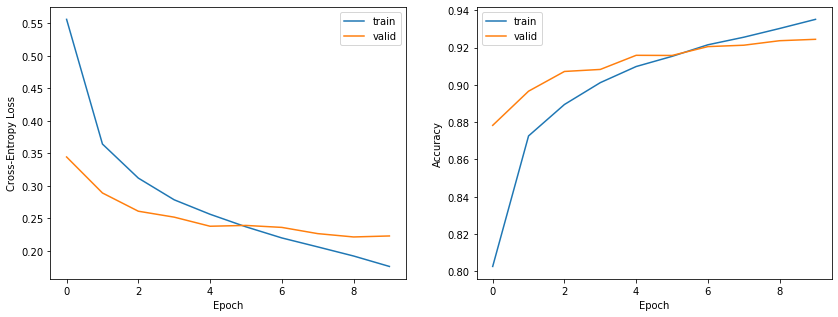

In [12]:
#Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu',input_shape=(784,), kernel_regularizer=l2(0.001))) 
# Use input_shape=(28,28) for unflattened data. 784
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2)) 
model.add(Dense(10, activation='softmax'))

model.summary()




plt.figure(1, figsize=(14,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(train_data[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.xticks([])
    plt.yticks([]) 
    
    
#Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#df     = pd.DataFrame(train_data) 
#df_label = pd.DataFrame(train_label)
#testdf = pd.DataFrame(test_data)
#dftrain = df.T
#dftest  = testdf
#dftrain_rn = dftrain.rename(columns={0: "x", 1: "y"})
#dftest_rn  = dftest.rename(columns={0: "x"})
#dftrain_rn.iloc[:,0:1]
#dftest_rn